In [6]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [7]:
df_db_hh = pd.read_table("../TFLearn/DB_HH_SUM.txt")

In [10]:
df_db_hh['SUM_CB_JE'] = df_db_hh['SUM_CB_JE'].fillna(0)
df_db_hh['SUM_FC_MJ'] = df_db_hh['SUM_FC_MJ'].fillna(0)
df_db_hh['SUM_GJJDK_JE'] = df_db_hh['SUM_GJJDK_JE'].fillna(0)
df_db_hh['SUM_GJJJN_JE'] = df_db_hh['SUM_GJJJN_JE'].fillna(0)
df_db_hh['SUM_SW_JE'] = df_db_hh['SUM_SW_JE'].fillna(0)
df_db_hh['DB_HH'] = df_db_hh['DB_HH'].astype('str')
df_db_hh['YZC'] = df_db_hh['YZC'].fillna(0)

In [11]:
df_db_hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5546 entries, 0 to 5545
Data columns (total 17 columns):
DB_HH           5546 non-null object
SUM_CB          5546 non-null int64
SUM_CL          5546 non-null int64
SUM_FC          5546 non-null int64
SUM_GJJDK       5546 non-null int64
SUM_GJJJN       5546 non-null int64
SUM_QY          5546 non-null int64
SUM_SW          5546 non-null int64
SUM_ALL         5546 non-null int64
SUM_CB_JE       5546 non-null float64
SUM_FC_MJ       5546 non-null float64
SUM_GJJDK_JE    5546 non-null float64
SUM_GJJJN_JE    5546 non-null float64
SUM_SW_JE       5546 non-null float64
DB_JE           5546 non-null float64
YZC             5546 non-null float64
ZCZS            5546 non-null int64
dtypes: float64(7), int64(9), object(1)
memory usage: 736.7+ KB


In [12]:
print(df_db_hh.shape)
# df_db_hh1 = df_db_hh[(df_db_hh['SUM_GJJDK_JE'] == 130000)]
df_db_hh = df_db_hh[(df_db_hh['DB_HH'] != '26005426')]
print(df_db_hh.shape)
# print(df_db_hh1.shape)
# print(df_db_hh2.shape)
# print(df_db_hh1)
df_db_hh_num  = df_db_hh.drop(['DB_HH'],1)
df_db_hh_num.info()

(5546, 17)
(5545, 17)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 5545 entries, 0 to 5545
Data columns (total 16 columns):
SUM_CB          5545 non-null int64
SUM_CL          5545 non-null int64
SUM_FC          5545 non-null int64
SUM_GJJDK       5545 non-null int64
SUM_GJJJN       5545 non-null int64
SUM_QY          5545 non-null int64
SUM_SW          5545 non-null int64
SUM_ALL         5545 non-null int64
SUM_CB_JE       5545 non-null float64
SUM_FC_MJ       5545 non-null float64
SUM_GJJDK_JE    5545 non-null float64
SUM_GJJJN_JE    5545 non-null float64
SUM_SW_JE       5545 non-null float64
DB_JE           5545 non-null float64
YZC             5545 non-null float64
ZCZS            5545 non-null int64
dtypes: float64(7), int64(9)
memory usage: 736.4 KB


In [13]:
np_db_hh = np.array(df_db_hh_num)

In [15]:
np_db_hh_1 = np.array(df_db_hh_num[['SUM_CB_JE','SUM_FC_MJ','SUM_GJJDK_JE','SUM_GJJJN_JE','SUM_SW_JE']])
np_db_hh_1_sum = np.array(np.sum(np_db_hh_1,axis=1))
np_db_hh_2 = np.array(df_db_hh_num['SUM_ALL']) 
np_db_hh_3 = np.array(df_db_hh_num['DB_JE']) 
np_db_hh_4 = np.array(df_db_hh_num['YZC']) 
np_db_hh_5 = np.array(df_db_hh_num['ZCZS']) 


np_db_sum_AJE_XS = np.vstack((np_db_hh_1_sum,np_db_hh_2)).T
np_db_sum_AJE_DBJE = np.vstack((np_db_hh_1_sum,np_db_hh_3)).T
np_db_sum_XS_DBJE = np.vstack((np_db_hh_2,np_db_hh_3)).T
np_db_sum_YZC_ZCZS = np.vstack((np_db_hh_4,np_db_hh_5)).T

np_db_sum_ALL =  np.vstack((np_db_hh_1_sum,np_db_hh_2,np_db_hh_3)).T


df_db_sum_ALL = pd.DataFrame(np_db_sum_ALL)

# 添加列名
df_db_sum_ALL.columns = ['AJE','XS', 'DBJE']

[0 0 0 ... 0 0 0]


<Figure size 432x288 with 0 Axes>

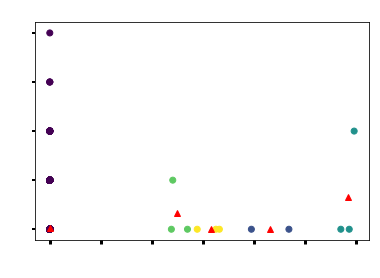

In [17]:

 
plt.figure()
X = np_db_sum_YZC_ZCZS
estimator= KMeans(n_clusters=5)
y_pred =estimator.fit_predict(X)

xy=estimator.cluster_centers_

np.set_printoptions(threshold=20)
print(y_pred)
# np.savetxt("y_pred.txt", y_pred, fmt="%d", delimiter=",")
# np.savetxt("xy.txt", xy, fmt="%d", delimiter=",")


fig, ax = plt.subplots()
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.plot(xy[:,0],xy[:,1],'r^')
plt.title("DB",color='white')
plt.xlabel('YZC ',color='white')
plt.ylabel('ZCZS ',color='white')
ax.tick_params(axis='x',labelcolor='white', labelsize='medium', width=3)
ax.tick_params(axis='y',labelcolor='white', labelsize='medium', width=2)
ymajorLocator = MultipleLocator(1)
ax.yaxis.set_major_locator(ymajorLocator)

<Figure size 432x288 with 0 Axes>

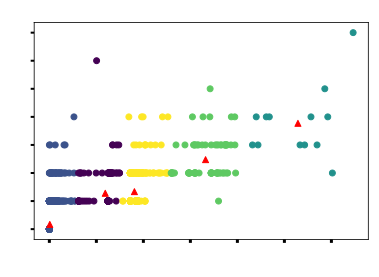

In [89]:

 
plt.figure()
X = np_db_sum_AJE_XS
estimator= KMeans(n_clusters=5)
y_pred =estimator.fit_predict(X)

xy=estimator.cluster_centers_

np.set_printoptions(threshold=20)
print(y_pred)
# np.savetxt("y_pred.txt", y_pred, fmt="%d", delimiter=",")
# np.savetxt("xy.txt", xy, fmt="%d", delimiter=",")


fig, ax = plt.subplots()
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.plot(xy[:,0],xy[:,1],'r^')
plt.title("DB",color='white')
plt.xlabel('AJE ',color='white')
plt.ylabel('XS ',color='white')
ax.tick_params(axis='x',labelcolor='white', labelsize='medium', width=3)
ax.tick_params(axis='y',labelcolor='white', labelsize='medium', width=2)
ymajorLocator = MultipleLocator(1)
ax.yaxis.set_major_locator(ymajorLocator)

[0 2 2 ... 2 0 4]


<Figure size 432x288 with 0 Axes>

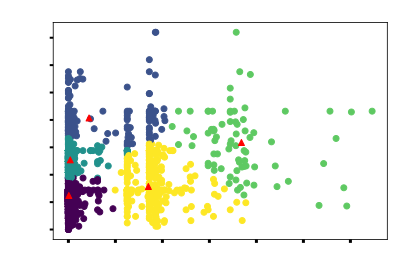

In [92]:
plt.figure()
X = np_db_sum_AJE_DBJE
estimator= KMeans(n_clusters=5)
y_pred =estimator.fit_predict(X)

xy=estimator.cluster_centers_

np.set_printoptions(threshold=20)

print(y_pred)
# np.savetxt("y_pred.txt", y_pred, fmt="%d", delimiter=",")
# np.savetxt("xy.txt", xy, fmt="%d", delimiter=",")

fig, ax = plt.subplots()
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.plot(xy[:,0],xy[:,1],'r^')
plt.title("DB",color='white')
plt.xlabel('AJE ',color='white')
plt.ylabel('DBJE ',color='white')
ax.tick_params(axis='x',labelcolor='white', labelsize='medium', width=3)
ax.tick_params(axis='y',labelcolor='white', labelsize='medium', width=2)

[0 2 2 ... 2 3 0]


<Figure size 432x288 with 0 Axes>

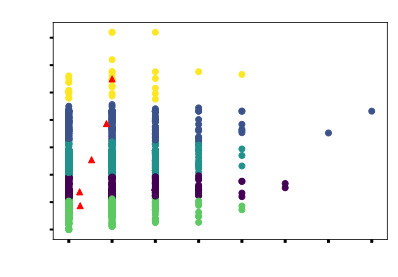

In [93]:

plt.figure()
X = np_db_sum_XS_DBJE
estimator= KMeans(n_clusters=5)
y_pred =estimator.fit_predict(X)

xy=estimator.cluster_centers_

np.set_printoptions(threshold=20)

print(y_pred)
# np.savetxt("y_pred.txt", y_pred, fmt="%d", delimiter=",")
# np.savetxt("xy.txt", xy, fmt="%d", delimiter=",")


fig, ax = plt.subplots()
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.plot(xy[:,0],xy[:,1],'r^')
plt.title("DB",color='white')
plt.xlabel('XS ',color='white')
plt.ylabel('DBJE ',color='white')
ax.tick_params(axis='x',labelcolor='white', labelsize='medium', width=3)
ax.tick_params(axis='y',labelcolor='white', labelsize='medium', width=2)

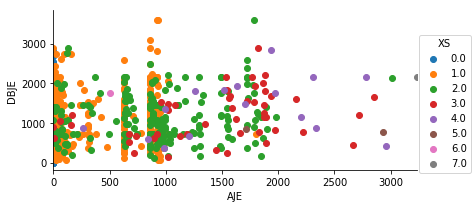

In [83]:
facet = sns.FacetGrid(df_db_sum_ALL, hue="XS",aspect=2)
# facet.map(sns.kdeplot,'AJE','DBJE',shade= True)
facet.map(plt.scatter,'AJE','DBJE')
facet.set(xlim=(0, df_db_sum_ALL['AJE'].max()))
facet.add_legend()

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


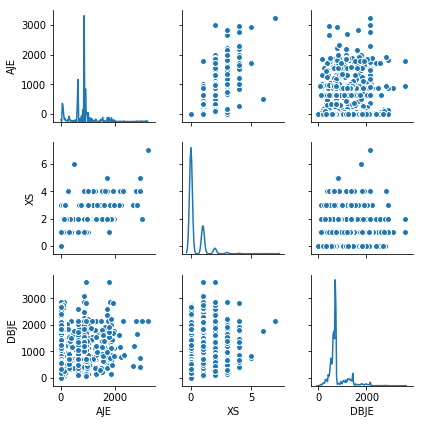

In [84]:
def splom_viz(df, labels=None):
    ax = sns.pairplot(df, hue=labels, diag_kind='kde', size=2)
    plt.show()
    

splom_viz(df_db_sum_ALL)

[8. 6.]


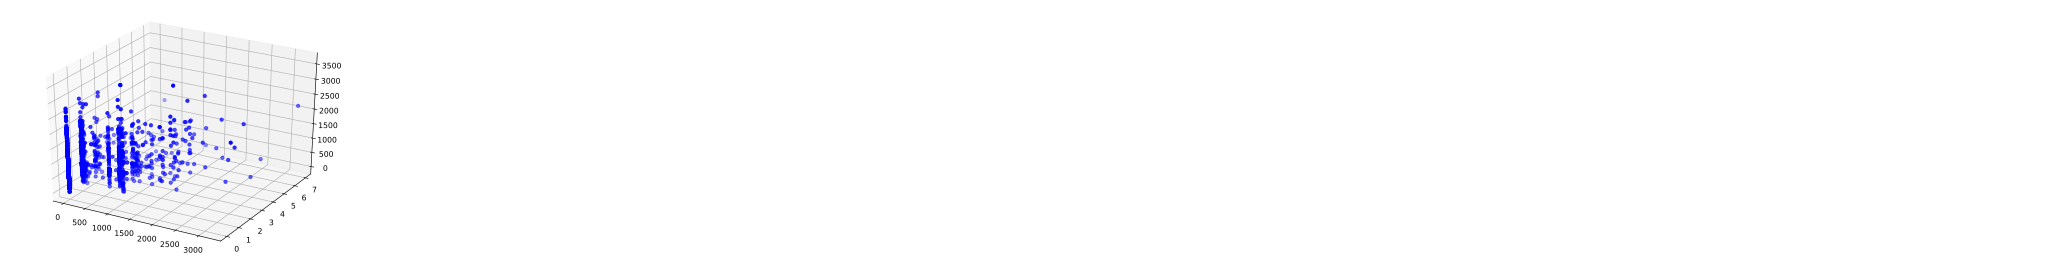

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%config InlineBackend.figure_format = 'svg'
fig = plt.figure(figsize=(8, 6))
axes = fig.add_subplot(111, projection='3d')

# fig = plt.subplots(1, figsize=(18, 8))

data = df_db_sum_ALL
x,y,z= data['AJE'],data['XS'],data['DBJE']

# 创建三维对象
# fig= plt.figure(figsize=(18, 8))
# ax = Axes3D(fig)
# axes = Axes3D(fig)
print(fig.get_size_inches())
# 绘制散点图
axes.scatter(x[:],y[:],z[:],c='b')
# axes.scatter(x[:],y[:],z[:],c='r')
# axes.scatter(x[:],y[:],z[:],c='g')

ymajorLocator = MultipleLocator(1)
axes.yaxis.set_major_locator(ymajorLocator)

# 显示图像
plt.show()